In [ ]:
# PENUMETSA SRI SAI ASHISH VARMA
# AM.EN.U4EEE20041
# MACHINE LEARNING LAB1A

In [161]:
# LINEAR REGRESSION WITH ONE VARIABLE

In [162]:
# ----> importing the modules <----

# imported numpy to perform calculations
import numpy as np
# imported pandas to import the data set -> csv file 
import pandas as pd
# imported matplotlib to visualize the data and regression LinearRegression 
import matplotlib.pyplot as plt

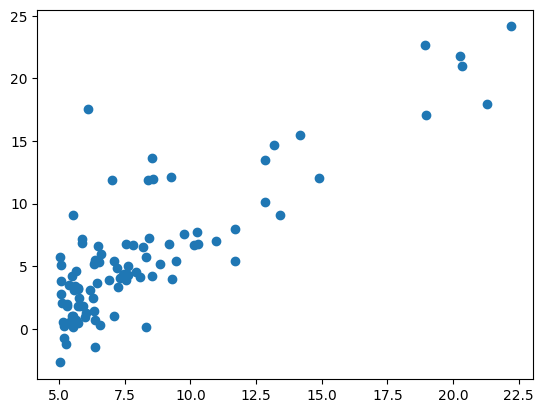

In [163]:
# preprocessing input data by loading the csv file dataset
data = pd.read_csv('ex1data1.txt', header=None)
data
# pllotiing the dataset values 
plt.scatter(data[0],data[1])

In [164]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [165]:
data_n = data.values
# printing the data values
data_n

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

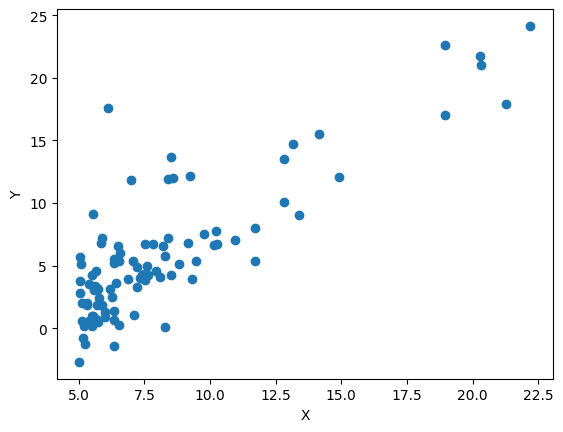

In [166]:
# getting all the row data values from the 1st column(index 0)
x = data_n[:, 0]
# getting all the row data values from the 2nd column(index 1)
y = data_n[:, 1]
# pllotiing the dataset values 
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
# show() method displays the figures
plt.show()

In [167]:
# gradient descent algorithm
m = len(x)
# converting x to a column vector
x = x.reshape(m, 1) 
# converting y to a column vector
y = y.reshape(m, 1)

# initialize theta as a column vector of zeros  
theta = np.zeros((2, 1))  

print("theta: ",theta)

# adding a column of ones to x for the intercept term
x = np.c_[np.ones(x.shape[0]), x]
print("x: ",x)

# learning rate -> controls how mmuch the value of m and c changes each time, for good accuracy l should be a small value 
# if the l is too large then gradient decent wont reach to minimum point and it keeps on oscillating
LRate = 0.0001  
# iterations to perform gradient descent -> for smaller l values we need to increase the no.of iteration for better accuracy
itr = 100000 

theta:  [[0.]
 [0.]]
x:  [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1. 

In [168]:
# cost function
def costfunction(x, y, theta):

    m = len(x)
    # y predicted value
    prediction = x.dot(theta)
    # finding error -> difference between predicated and actual value of y
    square_err = prediction - y
    # finding mean square of the error
    j = (1 / (2 * m)) * np.sum(np.square(square_err))
    
    # returning the costfunction values for storing to plot the cost function
    return j

In [169]:
# gradient descent algorithm
def gd_algo(x, y, theta, alpha, itr):

    m = len(x)
    # finding cost values
    # creating an array for the cost values
    cost = np.zeros((itr, 1))

    for i in range(itr):
        # finding predicted value
        prediction = x.dot(theta)
        # finding the error
        error = prediction - y
        # Partial derivative of loss function wrt m
        derivative = 1 / m * x.T.dot(error)
        # updating the theta value
        theta = theta - alpha * derivative
        # storing the cost function values
        cost[i] = costfunction(x, y, theta)
    
    return theta, cost

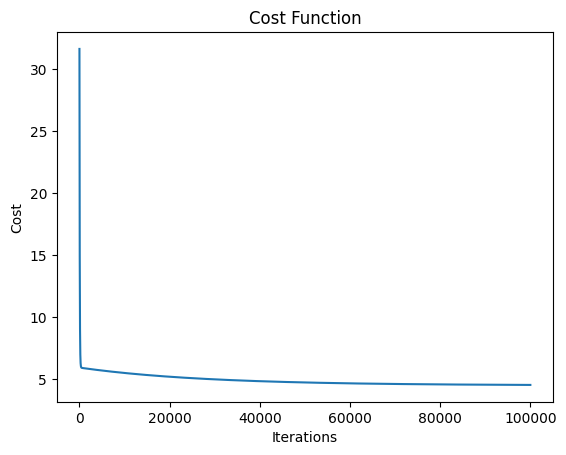

In [170]:

# calling the gradient descent algorithm function
theta, cost_history = gd_algo(x, y, theta, LRate, itr)

# ----> Plotting the cost function <----
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()


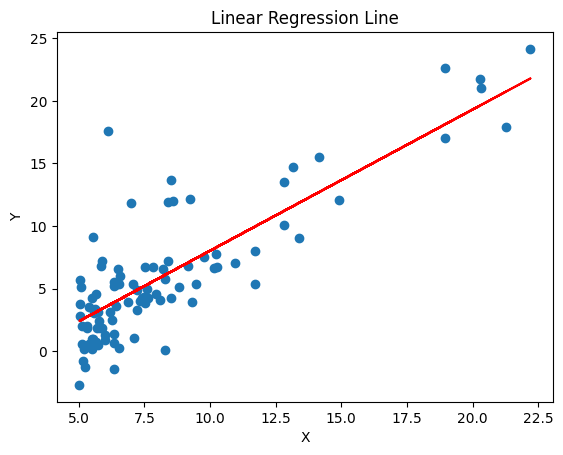

In [171]:
# ----> plotting the linear regression line <----
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], x.dot(theta), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Line')
plt.show()